In [1]:
FILEPATH = "data/task_data/2021-11-22.json"
import json


with open(FILEPATH) as json_file:
    data = json.load(json_file)
    
DEPR_ID = '749eb7bf-6ec5-475e-a3aa-ec88f8fdfda1'

In [9]:
import logging, sys
from load_data import get_dataframe_from_json

logger = logging.getLogger("{}.{}".format(
    __name__,
    sys._getframe().f_code.co_name)
)

def get_habit_df(raw_json_dict, habit_id):
    """
    Extracts a "habit history" dataframe from the given json dict.
    params:
    """
    for habit_json in data['tasks']['habits']:
        if habit_id == habit_json['id']:
            logger.debug(f"loading habit history df {habit_json['text']}")
            json_dict = habit_json['history']
            return get_dataframe_from_json(json_dict)
        else:
            logger.debug('.', end='')

<AxesSubplot:xlabel='date'>

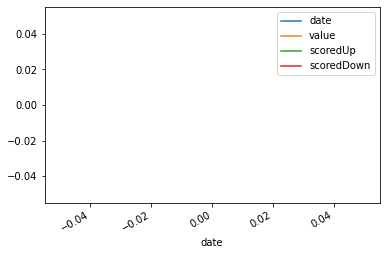

In [10]:
depr_df = get_habit_df(data, DEPR_ID)
depr_df.plot()

In [ ]:
from load_data import get_dataframe_from_json

# TODO: set up these things then use them:
HABIT_CONTRIBUTIONS = {
    'ab2bb81e-4aa9-4ff6-aa96-d7ba0816b43f':{
        'name': 'healthy / junk food',
        'mania_weight_pos': 0,
        'mania_weight_neg': 0
    }
}
    
for habit_json in data['tasks']['habits']:
    habit_name = habit_json['text']
    habit_id = habit_json['id']
    if habit_json['up'] is False and habit_json['down'] is False:
        break
    elif habit_id in HABIT_CONTRIBUTIONS:
        print(f"### {habit_name} ###########################################################")
        # skip entries with no data

        for key in ['up', 'down', 'counterUp', 'counterDown', 'type', 'notes', 'value']:
            print(f"{key}\t:{habit_json[key]}")
        json_dict = habit_json['history']
        dataframe = get_dataframe_from_json(json_dict)
        del dataframe['value']
        del dataframe['date']